In [2]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Занятие 4

### Критерии проверки гипотез (продолжение)

### QQ-Plot

**Квантиль-квантиль плот**

Используется для визуальной проверки принадлежности выборки распределению.

В основном, когда выборка небольшого размера.

In [3]:
sp =np.linspace(5, 9, 200)
pdf = stats.norm(x.mean(), x.var()).pdf(sp)
plt.hist(x, density=True)
plt.plot(sp, pdf)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

NameError: name 'x' is not defined

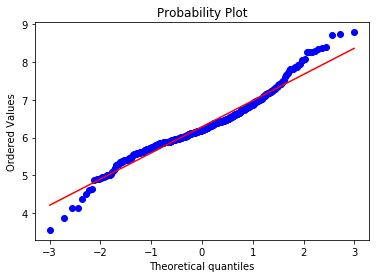

In [4]:
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
x = df['RM']
res = stats.probplot(x, plot=plt)


### Проверяем данные на нормальность, зачем?

#### Пример

$M_1 = 89.9,  s = 11.3, n=20$
$M_2 = 80.7,  s = 11.7, n=20$

$$H_0: M_1 = M_2$$

Используя $t-$критерий получим

$$t = 2.5 \Rightarrow p < 0.05$$

Если добавим по выбросу в каждую выборку и посчитав значения, получим

$$t= 0.03, p=0.97$$

#### Как бороться с выбросами?

Использовать ранговые критерии:

$$X_{(1)} \le ... \le X_{(n)}$$

### Критерий Манна-Уитни

Пусть $n_1, n_2$ -- размер 1-й и второй выборок соответственно. $N = n_1 + n_2$
- объединим обе выборки и произведем ранжирование
- посчитаем сумму рангов для каждой выборки
- $T_x \text{наибольшая из них, соответствующая выборке } n_x$ 

$$U = n_1 \cdot n_2 + \frac{n_x(n_x + 1)}{2} - T_x$$

Рассматриваем $U$ как p-value

## Критерий $\chi^2$

Пусть $X_1, ..., X_n$ --- выборка из схемы Бернулли с $m \ge 2$ исходами $a_1, ..., a_m$ --- исходы и $P(X_i = a_j) = p_j$

$$H_0 : p_j = p_j^0, j=1,...m$$

Статистика **хи-квадрат**: 
$$\hat \chi = \sum_{j=1}^{m} \dfrac{(\mu_j - np_j^0)^2}{np_j^0},$$


где $\mu_j = \displaystyle \sum_{i=1}^{n} I\{X_i = a_j\}$ --- число выпадений $j-$го исхода$

Теорема Пирсона утверждает, что в условиях гипотезы $H_0$:


$$\hat \chi \rightarrow^d \chi^2_{m-1}$$

### Критерий Пирсона

Если $\hat \chi > u_{1-\alpha}$, где $u_{1-\alpha}$ --- $(1-\alpha)$-квантиль распределения $\chi^2_{m-1}$, то отвергаем $H_0$


#### Пример

Есть данные о продаже литров молока в магазине по дня недели 

ПН – 36, ВТ – 53, СР – 35, ЧТ – 26, ПТ – 30, СБ – 44, ВС – 28.

**Гипотеза?**

$$ H_0 : \text{продажа молока не зависит от дня недели}$$

Проверить эту гипотезу на уровне $0.95$ и $0.99$